<a href="https://colab.research.google.com/github/Francisco2963/Optimizaci-n-de-Hiperpar-metros-ML/blob/main/Clasificaci%C3%B3n_y_Optimizaci%C3%B3n_de_Hiperpar%C3%A1metros_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación y Optimización de Hiperparámetros (Core)

Objetivo:

Implementar un pipeline completo de machine learning para un problema de clasificación utilizando técnicas de preprocesamiento, modelado, y optimización de hiperparámetros. Enfocar especialmente en la limpieza de datos y la optimización utilizando GridSearchCV y RandomizedSearchCV.

Descripción del Dataset: El dataset de costos médicos personales contiene información sobre varios factores que afectan los costos de seguros médicos, como la edad, el sexo, el índice de masa corporal, y el hábito de fumar. Este dataset es ideal para practicar técnicas de preprocesamiento y optimización de modelos debido a la presencia de datos sucios y variables tanto categóricas como numéricas.

Instrucciones:

Carga y Exploración Inicial de Datos:

Cargar el dataset desde Kaggle.

Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.

Identificar y documentar los valores faltantes y outliers en el dataset.

Preprocesamiento de Datos:

Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).

Codificar variables categóricas utilizando One-Hot Encoding.

Escalar características numéricas utilizando StandardScaler.

Implementación de Modelos de Clasificación:

Entrenar y evaluar al menos tres modelos de clasificación diferentes: Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.

Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.
Optimización de Hiperparámetros:

Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.

Implementar RandomizedSearchCV como método alternativo de optimización.

Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.

Evaluación de Modelos:

Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.

Generar y analizar la matriz de confusión para los modelos optimizados.

Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.

Documentación y Entrega:

Documentar todos los pasos del proceso en un notebook de Jupyter, incluyendo explicaciones detalladas y justificaciones para cada decisión tomada.

Subir el notebook y los resultados a un repositorio de GitHub.

Crear un tag de liberación (v1.0.0) para esta versión del proyecto en GitHub.


Entregables:

Notebook de Jupyter con todo el análisis y resultados.

Documentación completa del proceso de preprocesamiento, modelado y optimización.
Visualizaciones y análisis de las métricas de rendimiento.

Repositorio de GitHub con el notebook y los resultados, incluyendo un tag de liberación.

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [104]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [105]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [107]:
df.duplicated().sum()

1

In [108]:
# Borra duplicado
df.drop_duplicates(inplace=True)

In [109]:
df.duplicated().sum()

0

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [111]:
# Ordenar el indice
df.reset_index(drop=True, inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [113]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [114]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [115]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [116]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [117]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [118]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [119]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [120]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [121]:
df['charges'].value_counts()

,count
charges,
16884.92400,1
2117.33885,1
2221.56445,1
19798.05455,1
13063.88300,1
...,...
7345.08400,1
26109.32905,1
28287.89766,1


In [122]:
df['charges'].sort_values()

,charges
939,1121.87390
807,1131.50660
1243,1135.94070
662,1136.39940
22,1137.01100
...,...
818,55135.40209
577,58571.07448
1229,60021.39897
1299,62592.87309


identificacion de outliers

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [124]:
def calcular_outliers(df, columna):
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  outliers = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
  return outliers, Q1, Q3, IQR

outliers_age, Q1_age, Q3_age, IQR_age = calcular_outliers(df, 'age')
outliers_bmi, Q1_bmi, Q3_bmi, IQR_bmi = calcular_outliers(df, 'bmi')
outliers_children, Q1_children, Q3_children, IQR_children = calcular_outliers(df, 'children')
outliers_charges, Q1_charges, Q3_charges, IQR_charges = calcular_outliers(df, 'charges')



print(f'Outliers en age: \n{len(outliers_age)}')

print(f'Outliers en bmi: \n{len(outliers_bmi)}')

print(f'Outliers en children: \n{len(outliers_children)}')

print(f'Outliers en charges: \n{len(outliers_charges)}')



Outliers en age: 
0
Outliers en bmi: 
9
Outliers en children: 
0
Outliers en charges: 
139


Tratamiento outliers bmi

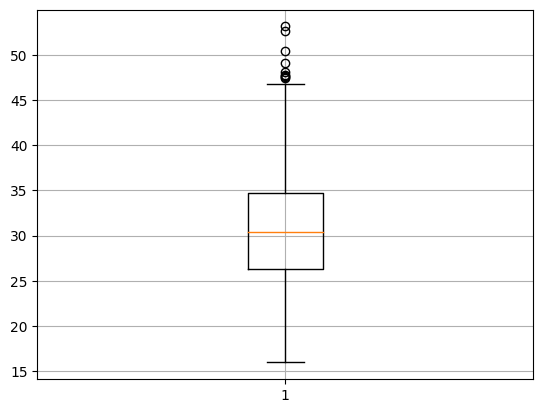


Hay personas con un índice de masa corporal significativamente más alto que el rango considerado saludable (18.5 a 24.9).


In [125]:
plt.boxplot(df['bmi'])
plt.grid(True)
plt.show()
print('\nHay personas con un índice de masa corporal significativamente más alto que el rango considerado saludable (18.5 a 24.9).')

In [126]:
# Calcular el percentil 95
percentil_95 = df['bmi'].quantile(0.95)
percentil_95


41.108000000000004

In [127]:
# Capar los valores superiores al percentil 95
df['bmi'] = np.where(df['bmi'] > percentil_95, percentil_95, df['bmi'])

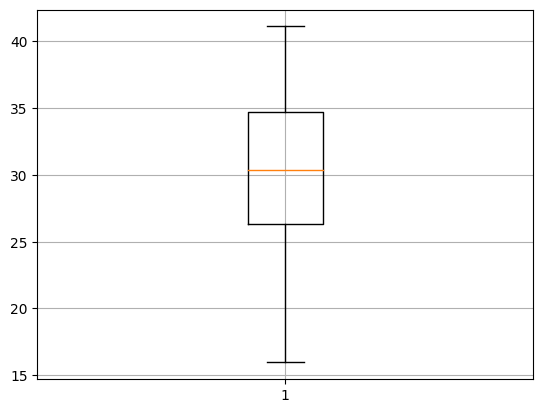


hemos eliminado todos los valores por sobre le percentil 95.


In [128]:
plt.boxplot(df['bmi'])
plt.grid(True)
plt.show()
print('\nhemos eliminado todos los valores por sobre le percentil 95.')

Tratamiento outliers charges

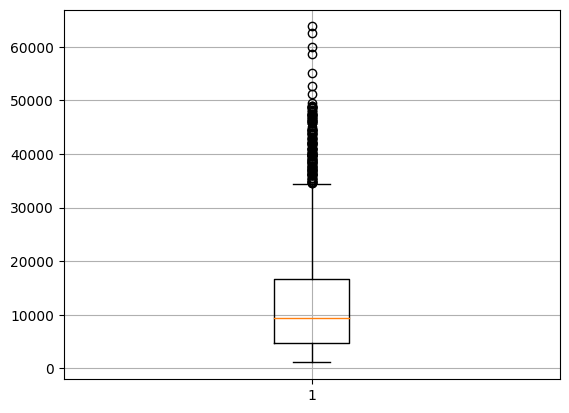

\La gran cantidad de outliers sugiere que hay un grupo de personas con costos médicos significativamente más altos que el resto.


In [129]:
plt.boxplot(df['charges'])
plt.grid(True)
plt.show()
print('\La gran cantidad de outliers sugiere que hay un grupo de personas con costos médicos significativamente más altos que el resto.')

COMENTARIO

No eliminaremos estos outliers del modelo

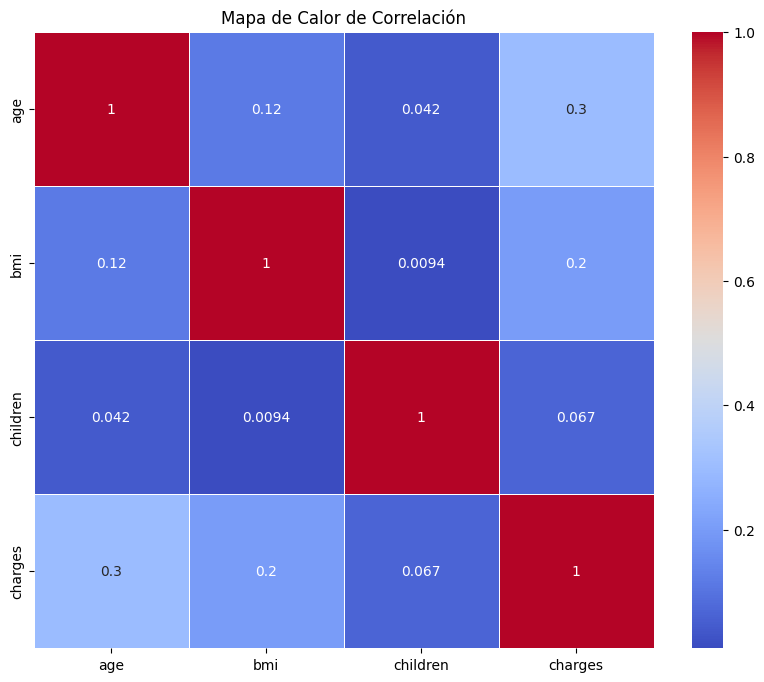

In [130]:
import seaborn as sns
df1=df.select_dtypes(exclude= ['object'])
# Seleccionar solo las columnas numéricas
numeric_df = df1
# Calcular la correlación
corr_matrix = numeric_df.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [132]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


COMENTARIO

charges" es una variable continua, lo que significa que puede tomar cualquier valor dentro de un rango. Los modelos de clasificación están diseñados para predecir categorías discretas (por ejemplo, sí/no, gato/perro).

Si utilizamos "charges" como variable objetivo, estaríamos intentando clasificar los datos en diferentes categorías de costos, lo cual no es el objetivo principal de este conjunto de datos.

Para poder aplicar modelos de clasificación a este conjunto de datos, necesitamos crear una nueva variable objetivo que sea categórica.

Crear una nueva variable binaria:

Definir un umbral: Establecer un valor umbral para "charges" y crear una nueva variable binaria que indique si el costo está por encima o por debajo de ese umbral (por ejemplo, "alto_costo" = 1 si "charges" > valor_umbral).

In [133]:
import numpy as np

In [134]:
df['alto_costo'] = np.where(df['charges'] > 25000, 'Sí', 'No')

In [135]:
# Crearemos nuestra variable objetivo'
#df['alto_costo'] = (df['charges'] > 25000).astype(int)

In [136]:
df['alto_costo'].unique()

array(['No', 'Sí'], dtype=object)

In [137]:
df['alto_costo'].value_counts()

,count
alto_costo,
No,1136
Sí,201


In [138]:
df.head()

,age,sex,bmi,children,smoker,region,charges,alto_costo
0,19,female,27.900,0,yes,southwest,16884.92400,No
1,18,male,33.770,1,no,southeast,1725.55230,No
2,28,male,33.000,3,no,southeast,4449.46200,No
3,33,male,22.705,0,no,northwest,21984.47061,No
4,32,male,28.880,0,no,northwest,3866.85520,No


# PP

In [139]:
X=df.drop(columns=['alto_costo'],axis=1)
y=df['alto_costo']

In [140]:
X

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [141]:
y

,alto_costo
0,No
1,No
2,No
3,No
4,No
...,...
1332,No
1333,No
1334,No
1335,No


In [142]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [143]:
label = LabelEncoder()
y = label.fit_transform(y)


In [144]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [145]:
#columnas numericas
variables_num =["age","bmi","charges" ]
num_transformer = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="mean")),
        ("scaler",StandardScaler())
    ]
)

#columnas categoricas
variabled_cat =["sex","smoker","region"]
cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación
        ("onehot",  OneHotEncoder(handle_unknown="ignore"))  # Codificación categorica
    ]
)

#se incluye un columntransformer para agrupar todas las transformaciones realizadas
preprocessor = ColumnTransformer(
    transformers=[
        ("num",num_transformer,variables_num),
        ("cat",cat_transformer,variabled_cat)
    ],
    remainder="passthrough",
    n_jobs=-1,
    verbose=True,
    sparse_threshold=0.3
)


# Pipeline final que incluye imputación condicional categórica, numerica y modelo
pipeline_KNNC = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

pipeline_DTC = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42))
])

pipeline_RL = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(penalty='l2',  # Tipo de regularizacion L2(Ridge)
                                 C=1.0,           # Inverso de la fuerza de regularizacion
                                 solver='lbfgs',  # Algoritmo para la optimizacion
                                 max_iter=100,    # Numero maximo de iteraciones
                                 tol=1e-4,        # Tolerancia para el criterio de parada
                                 random_state=42))  # Semilla para la reproductibilidad
])

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [173]:
print(X_train.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [147]:
#y = num_transformer.fit_transform(y.reshape(-1, 1))

In [148]:
# Entrenar el modelo
pipeline_KNNC.fit(X_train, y_train)
pipeline_DTC.fit(X_train, y_train)
pipeline_RL.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'charges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker', 'region'])],
                                   verbose=True)),
                ('model', LogisticRegression(random_state=42))])

In [149]:
y_pred_KNNC = pipeline_KNNC.predict(X_test)
y_pred_DTC = pipeline_DTC.predict(X_test)
y_pred_RL = pipeline_RL.predict(X_test)
y_prob_RL = pipeline_RL.predict_proba(X_test)[:, 1]

# KNN

Classification report for KNNC
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       339
           1       0.97      0.90      0.93        63

    accuracy                           0.98       402
   macro avg       0.97      0.95      0.96       402
weighted avg       0.98      0.98      0.98       402



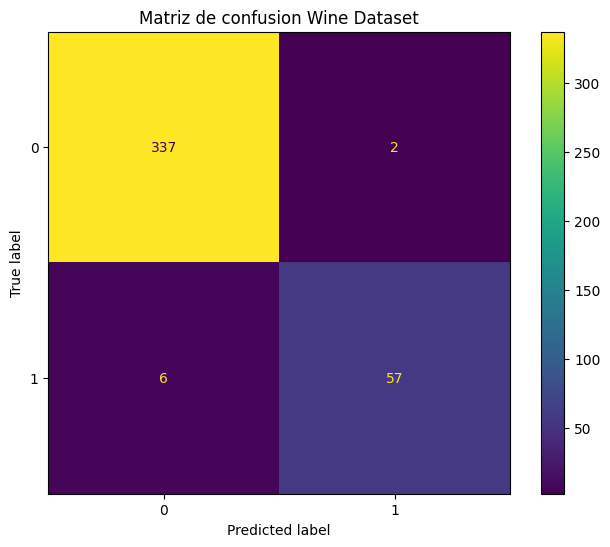

In [150]:
cm=confusion_matrix(y_test,y_pred_KNNC)
print("Classification report for KNNC")
print(classification_report(y_test,y_pred_KNNC))
cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Wine Dataset')
plt.show()

# ARBOL DE DECISION

Classification report for DTC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       339
           1       1.00      1.00      1.00        63

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



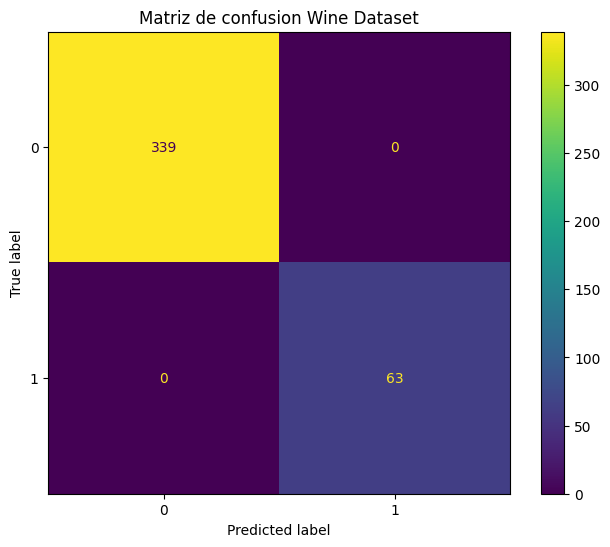

In [151]:
cm=confusion_matrix(y_test,y_pred_DTC)
print("Classification report for DTC")
print(classification_report(y_test,y_pred_DTC))
cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Wine Dataset')
plt.show()

# RL

Classification report for RFC
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       339
           1       1.00      0.95      0.98        63

    accuracy                           0.99       402
   macro avg       1.00      0.98      0.99       402
weighted avg       0.99      0.99      0.99       402



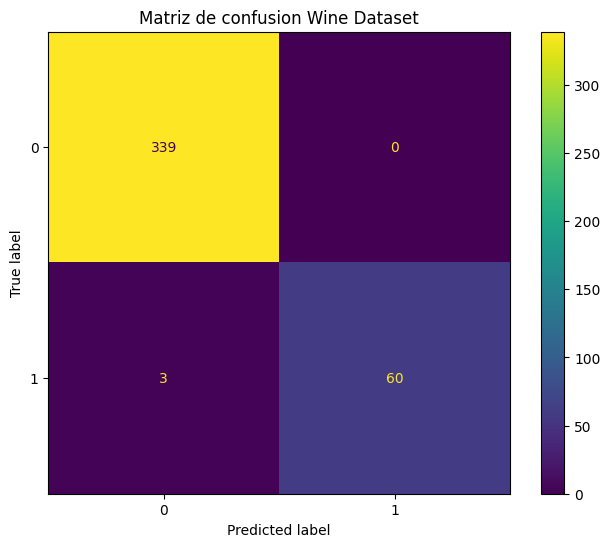

In [152]:
cm=confusion_matrix(y_test,y_pred_RL)
print("Classification report for RFC")
print(classification_report(y_test,y_pred_RL))
cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Wine Dataset')
plt.show()

In [153]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [154]:
# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_RL)
auc = roc_auc_score(y_test, y_prob_RL)

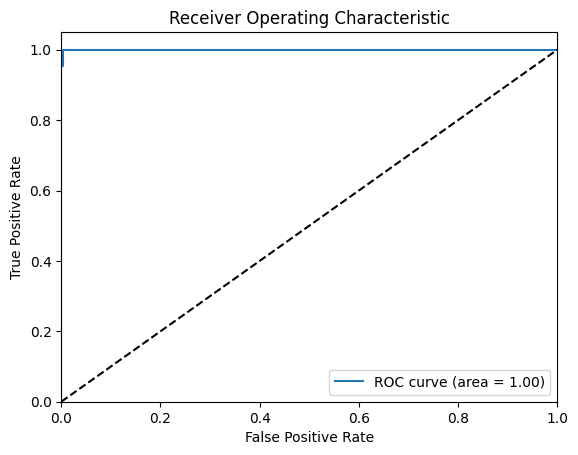

In [155]:
# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Implementación de GridSearchCV en RL

Paso 1: Definir el Espacio de Hiperparámetros

Primero, definimos los hiperparámetros que queremos optimizar y los valores posibles para cada uno.

In [191]:
from sklearn.model_selection import GridSearchCV

In [198]:
# Crear el modelo de Regresión Logística
pipeline_RL = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(penalty='l2',  # Tipo de regularizacion L2(Ridge)
                                 C=1.0,           # Inverso de la fuerza de regularizacion
                                 solver='lbfgs',  # Algoritmo para la optimizacion
                                 max_iter=100,    # Numero maximo de iteraciones
                                 tol=1e-4,        # Tolerancia para el criterio de parada
                                 random_state=42))  # Semilla para la reproductibilidad
])

In [205]:
# Definir el espacio de hiperparámetros para Regresion Logistica
param_grid = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'saga'],
    'model__max_iter': [100, 200, 300]
}

Paso 2: Configurar y Ejecutar GridSearchCV

In [206]:
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=pipeline_RL,param_grid= param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [207]:
# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'charges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])],
                                                          verbose=True)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__max_iter': [100, 200, 300],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [208]:

best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [209]:
# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'model__C': 1, 'model__max_iter': 200, 'model__penalty': 'l1', 'model__solver': 'saga'}


In [210]:
# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_RL = best_model.predict(X_test)

Classification report for RFC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       339
           1       1.00      0.98      0.99        63

    accuracy                           1.00       402
   macro avg       1.00      0.99      1.00       402
weighted avg       1.00      1.00      1.00       402



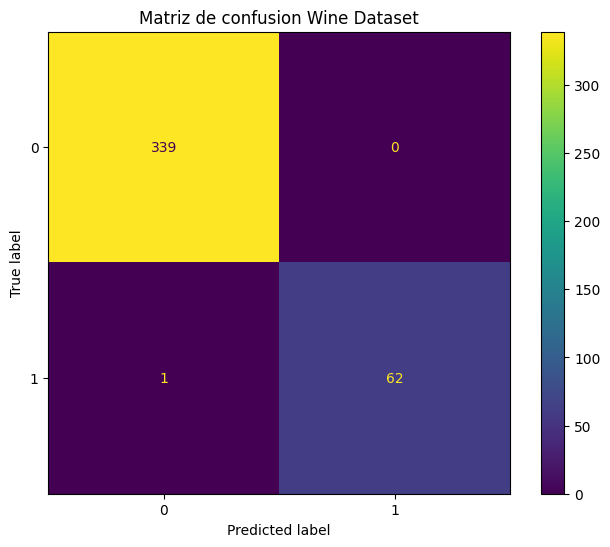

In [211]:
# Evaluar el modelo

cm=confusion_matrix(y_test,y_pred_RL)
print("Classification report for RFC")
print(classification_report(y_test,y_pred_RL))
cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Wine Dataset')
plt.show()

# Implementación de RandomizedSearchCV en KNN

In [212]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from scipy.stats import randint

In [213]:
# Crear el modelo de KNN
pipeline_KNNC = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

In [214]:
# Definir el espacio de hiperparámetros para KNN
param_dist = {
    'model__n_neighbors': randint(1, 30),   # Rango de vecinos
    'model__weights': ['uniform', 'distance'],  # Tipo de peso
    'model__p': randint(1, 2)   # Distancia de Minkowski, p=1 (Manhattan), p=2 (Euclidiana)
}

In [215]:
# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline_KNNC, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)


In [216]:
# Entrenar RandomizedSearchCV
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'bmi',
                                                                                'charges']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknow...
                                                                verbose=True)),
                                             ('model',
                                              KNeighborsClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79e7663a96f0>,
                                        'model__p': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79e7663ab910>,
                                        'model__weights': ['uniform',
                                                           'distance']},
                   random_state=42, scoring='accuracy')

In [217]:
# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", random_search.best_params_)

Mejores hiperparámetros encontrados: {'model__n_neighbors': 7, 'model__p': 1, 'model__weights': 'distance'}


In [218]:
# Evaluar el mejor modelo en el conjunto de prueba
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)

Classification report for KNNC
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       339
           1       0.98      0.87      0.92        63

    accuracy                           0.98       402
   macro avg       0.98      0.94      0.96       402
weighted avg       0.98      0.98      0.98       402



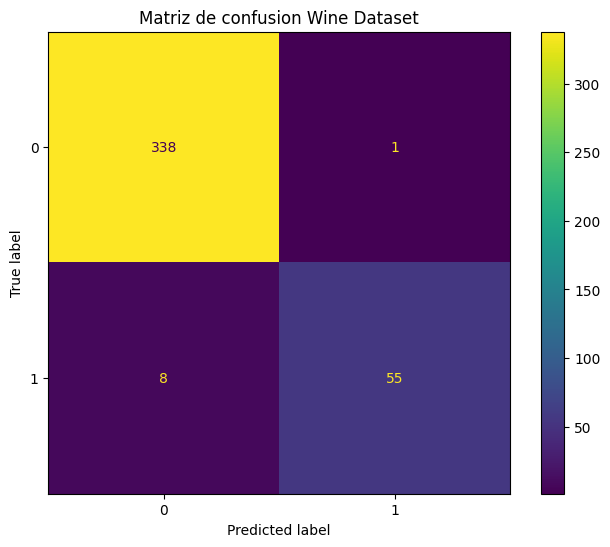

In [219]:
cm=confusion_matrix(y_test,y_pred_random)
print("Classification report for KNNC")
print(classification_report(y_test,y_pred_random))
cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Wine Dataset')
plt.show()